**Preprocesamiento Dataset Foros Moodle**

In [ ]:
!python -m spacy download es_core_news_sm
!pip install fasttext

%matplotlib inline
from matplotlib import pyplot as plt
import csv
import warnings
import lxml.html.clean
warnings.filterwarnings('ignore')
import re
from re import sub
import multiprocessing
from textblob import TextBlob
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk import FreqDist
from bs4 import BeautifulSoup
import re, string, unicodedata
import spacy
from sklearn.metrics import accuracy_score

from nltk.tokenize.toktok import ToktokTokenizer
import collections

from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')

nltk.download('stopwords') 
stop_words =stopwords.words('spanish')




     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16.2 MB 5.2 MB/s 
‚úî Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2) Importar los datos csv en en un dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

header_list = ["texto", "sentiment"]
train_data=pd.read_csv('/content/gdrive/My Drive/TFM_Analisis_Sentimientos/Corpus/moodle.csv', delimiter='|', encoding='utf-8',engine='python',header=None,names=header_list)

Mounted at /content/gdrive/


3) An√°lisis preeliminar de datos

In [ ]:
#Explorar 5 primeras filas
train_data.sample(5)

texto  \
30683  <p>Las personas tenemos varias formas de aprender, pero bien es cierto que depende tambi√©n de la informaci√≥n a tratar, ya que, para algunos de nosotros se nos dificulta porque hemos estado acostumbrados a una rutina de aprendizaje muy diferente, en este video nos damos cuenta que cada persona posee una capacidad distinta para aprender, pero aun con esto, logramos adquirir la informaci√≥n que nos desean transmitir. El aprendizaje esta en cada persona y en sus ganas de tener nuevos conocimientos en su vida personal, acad√©mica, laboral y es bien dicho que ¬†el que quiere lo logra. ¬†</p><p>¬†</p><p>https://www.youtube.com/watch?v=A8WpqhODdBI</p>                                                                                                                                                                                                                                                                                                                                                       
51     <p>aprender y manejar el idioma, enriquecer el vocabulario</p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
14073  <div class="text_to_html">Bienvenida Daniela!!</div>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
9716   <div class="text_to_html">Los modelos pedag√≥gicos se caracterizan por ser din√°micos, flexibles y adaptables a los contextos sociales, raz√≥n por la cual los actuales modelos pedag√≥gicos con su fundamentaci√≥n te√≥rica, vienen contribuyendo al afianzamiento de una educaci√≥n mediada por la tecnolog√≠a, porque esos modelos y teor√≠as pedag√≥gicas se transforman deductivamente en unos referentes que gu√≠an la acci√≥n en el aula e inductivamente se materializan mediante estrategias did√°cticas direccionadas a alcanzar los fines del aprendizaje, y es aqu√≠ precisamente, donde las pr√°cticas educativas se interrelacionan con las innovaciones tecnol√≥gicas.<br />Adem√°s, las diferentes teor√≠as sobre modelos pedag√≥gicos dan respuestas a los cambios contextuales y momentos coyunturales desde diferentes perspectivas psicol√≥gicas, filos√≥ficas, antropol√≥gicas, econ√≥micas, pol√≠ticas y tecnol√≥gicas, de modo que se dispone de una amplia gama de posibilidades ante diferentes p

In [ ]:
train_data.dtypes

texto        object
sentiment    int64 
dtype: object

In [ ]:
#Explorar 5 ultimas filas
train_data.tail(5)

texto  \
34404  <p>Buenos d√≠as</p><p>Hoy nos encontraremos a las 2pm para resolver algunas dudas del procedimiento de sustentaci√≥n y entrega del documento definitivo para culminar el trabajo de grado</p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
#Revisar estructura del dataset
train_data.dtypes

texto        object
sentiment    int64 
dtype: object

In [ ]:
#An√°lisis de datos
# N√∫mero total de filas y columnas
print(f"*****El dataset contiene:{train_data.shape[0]} filas y {train_data.shape[1]} columnas *****")
#Filas que tienen datos duplicados
duplicate_rows_td = train_data[train_data.duplicated()]
print("*****Filas duplicadas", duplicate_rows_td.shape[0])
#N√∫mero de filas antes de eliminar duplicados
print(f"*****N√∫mero de filas antes de eliminar duplicados ***** \n{train_data.count()}", "\n")
#Eliminar duplicados
train_data = train_data.drop_duplicates()
#N√∫mero de filas antes de eliminar duplicados
print(f"*****N√∫mero de filas despu√©s de eliminar duplicados ***** \n{train_data.count()}", "\n")
print(f"*****Datos nulos en alguna columna ***** \n{train_data.isnull().sum()}", "\n")
#Eliminar Nulos
train_data = train_data.dropna() 
print(f"*****Luego de eliminar nulos ***** \n{train_data.count()}", "\n")
#Filtrar solo aquellos que tienen texto >5 caracteres
train_data = train_data[(train_data['texto'].apply(len) >10)]

*****El dataset contiene:34409 filas y 2 columnas *****
*****Filas duplicadas 0
*****N√∫mero de filas antes de eliminar duplicados ***** 
texto        34409
sentiment    34409
dtype: int64 

*****N√∫mero de filas despu√©s de eliminar duplicados ***** 
texto        34409
sentiment    34409
dtype: int64 

*****Datos nulos en alguna columna ***** 
texto        0
sentiment    0
dtype: int64 

*****Luego de eliminar nulos ***** 
texto        34409
sentiment    34409
dtype: int64 



In [ ]:
#Funciones para limpiar el texto
#!pip install spacy
#!python -m spacy download es_core_news_sm
stemmer = SnowballStemmer("spanish")
import fasttext
path_to_pretrained_model = '/content/gdrive/My Drive/TFM_Analisis_Sentimientos/Corpus/lid.176.bin'
fmodel = fasttext.load_model(path_to_pretrained_model)
stop_words.extend(['si', 'tambien', 'asi', 'debe', 'tener','cada','ademas','parte','ser','ma','mismo','mas'])  

#Funcion para remover tags html
def html_remover(data):
  beauti = BeautifulSoup(data,'html.parser')
  return beauti.get_text()

#Funcion para Remover URLs
def url_remover(data):
  return re.sub(r'https\S','',data)

def clean_text(text):
  #Convertir a min√∫sculas
  text = text.lower()
  #LLamar funciones para remover html y urls
  text= html_remover(text)
  text = url_remover(text) 
  #Eliminar texto entre corchetes, signos de puntuacion y numeros
  text = re.sub('\[.*?¬ø\]\%', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[‚Äò‚Äô‚Äú‚Äù‚Ä¶¬´¬ª]', '', text)
  text = re.sub('\n','', text)
  

  #Eliminar tildes y diacriticas
  text = re.sub('√°', 'a', text)
  text = re.sub('√©', 'e', text)
  text = re.sub('√≠', 'i', text)
  text = re.sub('√≥', 'o', text)
  text = re.sub('√∫', 'u', text)
  text = re.sub('√º', 'u', text)
  text = re.sub('√±', 'n', text)
  text = re.sub('¬ø', '', text)

  return text

def tokenize_text(text):
  text = word_tokenize(text) 
  text = [word for word in text if word not in stop_words]
  return text

def lang_detect(text):
  languages = ["spanish","english","dutch","german","italian","portuguese","turkish","danish","french"]
  lang_count = {}
  tokens = nltk.tokenize.word_tokenize(text)
  tokens = [t.strip().lower() for t in tokens]
  for lang in languages:
    stop_words_l = str(nltk.corpus.stopwords.words(lang))
    lang_count[lang] = 0
    for word in tokens:
      if word in stop_words_l:
        lang_count[lang] += 1
  detected_language = max(lang_count, key=lang_count.get)
  return detected_language

def lang_detect_2(text):
  nlp = spacy.load('en')  # 1
  nlp.add_pipe(LanguageDetector(), name='language_detector', last=True) #2
  doc = nlp(text) #3
  detect_language = doc._.language #4
  return(detect_language)

def lang_detect_3(text):
  lang=fmodel.predict(text)  # ([['__label__en']], [array([0.9331119], dtype=float32)]
  return lang[0][0].replace('__label__', '')

4) Ejecutar limpieza de texto y detecci√≥n de idioma

In [ ]:
#Ejecutar limpieza de datos
train_data['cleaned'] = train_data['texto'].apply(clean_text)

In [ ]:
#Explorar los datos una vez ejecutadas las funciones de limpieza
train_data.sample(3)

texto  \
31893  <p>Cordial saludo.</p><p>Mi nombre es Olimpo Coneo Sarmiento, natural del municipio de Soplaviento, Bol√≠var.</p><p>Actualmente resido en Buenaventura, Valle, donde ejerzo labor pastoral. Soy licenciado en Lenguas Modernas, egresado de la Universidad del Atl√°ntico, y desde hace 26 a√±os me he dedicado al ministerio pastoral, en lo cual he tratado continuamente con las familias de mi comunidad religiosa.</p><p>En el curso de Pensamiento Sist√©mico espero adquirir m√°s herramientas y conocimientos formales aplicables en mi tarea de pastorear a los miembros de estas familias.</p><p>¬†</p>   
19580  <p>EL BUEN GOBIERNO</p><p>¬†</p><p>Conforme al documento de lectura la cultura empresarial en algunas empresas es de tipo autoritaria donde el due√±o ejerce poder absoluto como reflejo del ‚ÄúGobierno Corporativo‚Äù similar al que se ve reflejado en la infraestructura vial.</p><p>Establece tambi√©n que existe una diferencia entre lo que es la Ley respecto del C√≥digo del buen gobierno</p>                                                                                                                                                                                                               
26871  <p>BUENAS TARDES ESTAS SON MIS RESPUESTAS AL FORO #1</p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

       sentiment  \
31893  0           
19580  0           
26871  0           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          cleaned  
31893  cordial saludomi nombre es olimpo coneo sarmiento natural del municipio de soplaviento bolivaractualmente resido en buenaventura valle donde ejerzo labor pastoral soy licenciado en lenguas modernas egresado de la universidad del atlantico y desde hace  anos me he dedicado al ministerio pastoral en lo cual he tratado continuamente con las familias de mi comunidad religiosaen el curso de pensamiento sistemico espero adquirir mas herramientas y conocimientos formales aplicables en mi tarea de pastorear a los miembros de estas familias¬†  
19580  el buen gobierno¬†conforme al documento de lectura la cultura empresarial en algunas empresas es de tipo autoritaria donde el dueno ejerce poder absoluto como reflejo del gobierno corporativo similar al que se ve reflejado en la infraestructura vialestablece tambien que existe una diferencia entre lo que es la ley respecto del codigo del buen gobierno                                                                                                                                                                                            
26871  buenas tardes estas son mis respuestas al foro

In [ ]:
#Detectar texto en otros idiomas idioma
train_data['lang'] = train_data['cleaned'].apply(lang_detect_3)

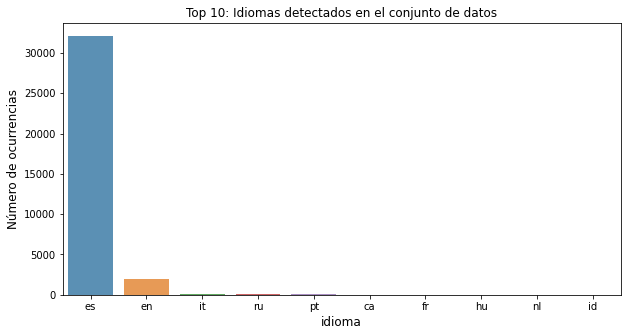

In [ ]:
#Agrupar datos por idioma

lang_count  = train_data["lang"].value_counts()
lang_count = lang_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(lang_count.index, lang_count.values, alpha=0.8)
plt.title('Top 10: Idiomas detectados en el conjunto de datos')
plt.ylabel('N√∫mero de ocurrencias', fontsize=12)
plt.xlabel('idioma', fontsize=12)
plt.show()

5) Filtrar solo los de idioma espa√±ol

In [ ]:
train_data = train_data[(train_data['lang'] == 'es')]
print(f"*****Cantidad de registros luego de filtrar el idioma ***** \n{train_data.count()}", "\n")

*****Cantidad de registros luego de filtrar el idioma ***** 
texto        32102
sentiment    32102
cleaned      32102
lang         32102
dtype: int64 



6) Realizar segundo an√°lisis sobre el texto en espa√±ol

*****Nube de Palabras ***** 
 



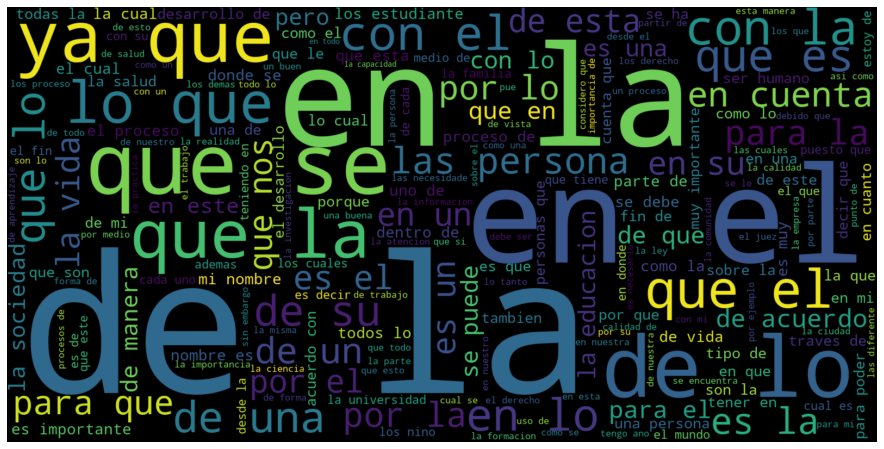

*****2000 palabras mas frecuentes ***** 
[('de', 252275), ('la', 175581), ('que', 162432), ('y', 134223), ('en', 119311), ('el', 117530), ('a', 88428), ('los', 66630), ('se', 65872), ('es', 55493), ('las', 52263), ('un', 46600), ('para', 46486), ('una', 40658), ('por', 40619), ('con', 40445), ('del', 38849), ('como', 34857), ('no', 30212), ('lo', 28986), ('su', 23752), ('al', 22596), ('o', 21215), ('mas', 18083), ('esta', 17808), ('ya', 15237), ('mi', 15041), ('este', 14116), ('ser', 13691), ('son', 13135), ('nos', 11999), ('sus', 11328), ('me', 10918), ('muy', 10307), ('si', 10156), ('personas', 9750), ('vida', 9646), ('manera', 9624), ('donde', 9249), ('cual', 9192), ('puede', 8906), ('tambien', 8640), ('asi', 8321), ('debe', 8316), ('cada', 8242), ('tener', 7954), ('sobre', 7531), ('importante', 7441), ('pero', 7379), ('desde', 7270), ('todo', 7183), ('parte', 7022), ('proceso', 6832), ('ha', 6806), ('tiene', 6594), ('esto', 6477), ('entre', 6330), ('cuenta', 6223), ('sin', 6172), (

In [ ]:
#Unir el dataset limpio una sola cadena para realizar an√°lisis
dataset = [x for x in train_data['cleaned']]
dataset = ' '.join(dataset)

#Imprimir nube de palabras
print(f"*****Nube de Palabras ***** \n", "\n")
wordcloud = WordCloud(
    background_color='black',
    width=1600, height=800).generate(dataset)
plt.figure( figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

tokenizer = ToktokTokenizer()
dataset_tokens = tokenizer.tokenize(dataset)

freq_splits = FreqDist(dataset_tokens)
print(f"*****2000 palabras mas frecuentes ***** \n{freq_splits.most_common(1000)}", "\n")

word_counts = collections.Counter(dataset_tokens)
print(print(f"***** Contador de Palabras ***** \n{word_counts}", "\n"))

Dividir en tokens y eliminar palabras vac√≠as

*****Nube de Palabras ***** 
 



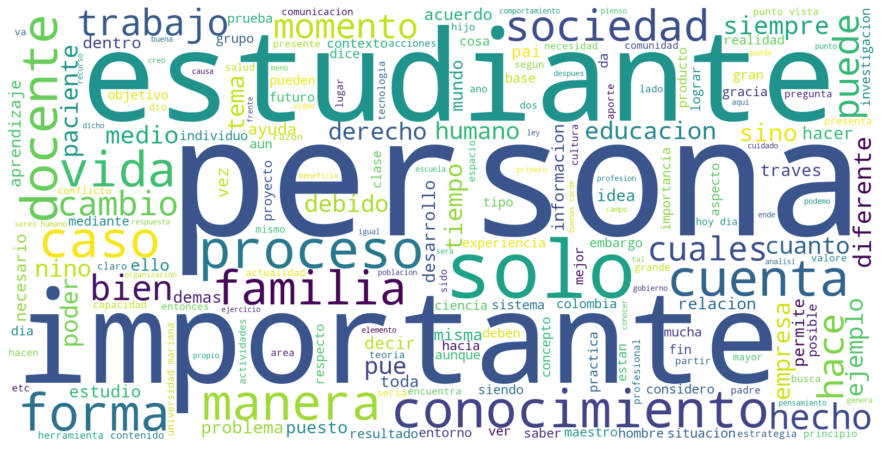

In [ ]:
#Dividir en palabras y eliminar palabras vacias
train_data['tokenized'] = train_data['cleaned'].apply(tokenize_text)

#Imprimir nube de palabras sin stop words
def to_doc(words:tuple) -> spacy.tokens.Doc:
    return ' '.join(words)

train_data['tokens_string'] = train_data['tokenized'].apply(to_doc)

dataset_stw = [x for x in train_data['tokens_string']]
dataset_stw = ' '.join(dataset_stw)

#Imprimir nube de palabras
print(f"*****Nube de Palabras ***** \n", "\n")
wordcloud = WordCloud(
    background_color='white',
    width=1600, height=800).generate(dataset_stw)
plt.figure( figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
train_data.head()

texto  \
0  <p>Este espacio esta creado para conocer a los participantes en el curso.</p><p>Por favor haga su presentaci√≥n.<br></p>                                                                                                                                                                                           
1  <p>Te invito a que comentes tus expectativas que tienes sobre este curso. Para ello, adjunto los temas a abordar. Deja tu opini√≥n en este foro, y comenta al menos una opini√≥n de tus compa√±eros. Recuerda, todo dentro del marco del respeto por las opiniones de los dem√°s.</p>                                 
2  tener y ahondar mas los conocimientos de ingles para as√≠ poder tener mas conocimientos de los temas expuestos de los temas &nbsp;en el curso de ingles                                                                                                                                                            
3  tener una buena base de ingles I para as√≠ poder empezar con lecturas muy cortas y luego ir avanzando hasta poder defenderse en el ingles.                                                                                                                                                                         
4  <p>Mis expectativas para este curso es poder reforzar mis bases de ingles adquiridas en cursos anteriores &nbsp;en los cuales no le he tenido mucho amor a el ingles y en este curso espero poder colega gusto a el idioma y aprenderlo mucho mejor ya que se esta convirtiendo en un idioma muy importante</p>   

   sentiment  \
0  0           
1  0           
2  0           
3  0           
4  0           

                                                                                                                                                                                                                                                                                               cleaned  \
0  este espacio esta creado para conocer a los participantes en el cursopor favor haga su presentacion                                                                                                                                                                                                   
1  te invito a que comentes tus expectativas que tienes sobre este curso para ello adjunto los temas a abordar deja tu opinion en este foro y comenta al menos una opinion de tus companeros recuerda todo dentro del marco del respeto por las opiniones de los demas                                   
2  tener y ahondar mas los conocimientos de ingles para asi poder tener mas conocimientos de los temas expuestos de los temas ¬†en el curso de ingles                                                                                                                                                     
3  tener una buena base de ingles i para asi poder empezar con lecturas muy cortas y luego ir avanzando hasta poder defenderse en el ingles                                                                                                                                                              
4  mis expectativas para este curso es poder reforzar mis bases de ingles adquiridas en cursos anteriores ¬†en los cuales no le he tenido mucho amor a el ingles y en este curso espero poder colega gusto a el idioma y aprenderlo mucho mejor ya que se esta convirtiendo en un idioma muy importante   

  lang  \
0  es    
1  es    
2  es    
3  es    
4  es    

                                                                                                                                                                                                       tokenized  \
0  [espacio, creado, conocer, participantes, cursopor, favor, haga, presentacion]                                                                                                                                  
1  [invito, comentes, expectativas, curso, ello, adjunto, te

Etiquetar el sentimiento del texto de los foros

*Buscar los lemas * 

In [ ]:
nlp = spacy.load('es_core_news_sm')

def to_doc(words:tuple) -> spacy.tokens.Doc:
    return nlp(' '.join(words))

def lemmatize(doc) -> list:
    return [token.lemma_ for token in doc if token not in {'temas'}]

docs = list(map(to_doc, train_data.tokenized))
train_data['lemmatized'] = list(map(lemmatize, docs))

#train_data['stemmed'] = train_data['tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
train_data.head()


texto  \
0  <p>Este espacio esta creado para conocer a los participantes en el curso.</p><p>Por favor haga su presentaci√≥n.<br></p>                                                                                                                                                                                           
1  <p>Te invito a que comentes tus expectativas que tienes sobre este curso. Para ello, adjunto los temas a abordar. Deja tu opini√≥n en este foro, y comenta al menos una opini√≥n de tus compa√±eros. Recuerda, todo dentro del marco del respeto por las opiniones de los dem√°s.</p>                                 
2  tener y ahondar mas los conocimientos de ingles para as√≠ poder tener mas conocimientos de los temas expuestos de los temas &nbsp;en el curso de ingles                                                                                                                                                            
3  tener una buena base de ingles I para as√≠ poder empezar con lecturas muy cortas y luego ir avanzando hasta poder defenderse en el ingles.                                                                                                                                                                         
4  <p>Mis expectativas para este curso es poder reforzar mis bases de ingles adquiridas en cursos anteriores &nbsp;en los cuales no le he tenido mucho amor a el ingles y en este curso espero poder colega gusto a el idioma y aprenderlo mucho mejor ya que se esta convirtiendo en un idioma muy importante</p>   

   sentiment  \
0  0           
1  0           
2  0           
3  0           
4  0           

                                                                                                                                                                                                                                                                                               cleaned  \
0  este espacio esta creado para conocer a los participantes en el cursopor favor haga su presentacion                                                                                                                                                                                                   
1  te invito a que comentes tus expectativas que tienes sobre este curso para ello adjunto los temas a abordar deja tu opinion en este foro y comenta al menos una opinion de tus companeros recuerda todo dentro del marco del respeto por las opiniones de los demas                                   
2  tener y ahondar mas los conocimientos de ingles para asi poder tener mas conocimientos de los temas expuestos de los temas ¬†en el curso de ingles                                                                                                                                                     
3  tener una buena base de ingles i para asi poder empezar con lecturas muy cortas y luego ir avanzando hasta poder defenderse en el ingles                                                                                                                                                              
4  mis expectativas para este curso es poder reforzar mis bases de ingles adquiridas en cursos anteriores ¬†en los cuales no le he tenido mucho amor a el ingles y en este curso espero poder colega gusto a el idioma y aprenderlo mucho mejor ya que se esta convirtiendo en un idioma muy importante   

  lang  \
0  es    
1  es    
2  es    
3  es    
4  es    

                                                                                                                                                                                                       tokenized  \
0  [espacio, creado, conocer, participantes, cursopor, favor, haga, presentacion]                                                                                                                                  
1  [invito, comentes, expectativas, curso, ello, adjunto, te

Cargar archivos de palabras positivas y negativas

In [ ]:
with open("/content/gdrive/My Drive/TFM_Analisis_Sentimientos/Corpus/positive_words_es.txt") as f:
    pos_words = f.readlines()
    pos_words = [x.strip() for x in pos_words] 
    
with open("/content/gdrive/My Drive/TFM_Analisis_Sentimientos/Corpus/negative_words_es.txt") as f:
    neg_words = f.readlines()
    neg_words = [x.strip() for x in neg_words] 

Funci√≥n para predecir sentimiento

In [ ]:
def sentiment_score(doc):
  y_pred = []
  for sentence in doc:
    pos_score = 0
    words = sentence.split()
    for word in words:
        if word in pos_words:           
            pos_score += 1
        if word in neg_words:          
            pos_score -= 1
   
    if pos_score > 0:
        return 'POSITIVO'
    elif pos_score < 0:
        return 'NEGATIVO'
    else:
        return 'NEUTRAL'       
    return pos_score

def source_data(row):
  return 'FORO'

train_data['sentiment'] = train_data['lemmatized'].apply(sentiment_score)
train_data['source'] = train_data.apply(source_data,axis=1)


In [ ]:
train_data.sample(5)

texto  \
17489  <p>Teniendo en cuenta que el paradigma¬† cualitativo¬† se interesa en comprender la conducta del ser humano¬† en el actuar cotidiano y el paradigma cuantitativo busca las causas de los fen√≥menos a trav√©s de la recolecci√≥n y an√°lisis de datos. Los paradigmas son un¬† camino que nos ayudaran a desarrollar los procesos investigativos que de acuerdo a nuestras ideas y orientaci√≥n en la forma de abarcar, abordar y ampliar los m√©todos ¬†en una investigaci√≥n, donde cada uno de los paradigmas desarrolla aspectos importantes en una investigaci√≥n.</p><p>El paradigma cualitativo¬† nos lleva a transformar¬† a las personas porque la misma sociedad est√° en continuo cambio y eso quiere decir que el paradigma no debe ser r√≠gido, por el contrario debe flexibilizase para adaptarse y centrarse en los cambios para cambiar su perspectiva.</p>                                                                                                                                                                    
21328  <p>Doctora Alejandra</p><p>¬†</p><p>Buenos Dias por favor me recuerda el correo para compartir la actividad</p><p>¬†</p><p>Mil gracias</p><p>¬†</p><p>¬†</p><p>Maria E. Narvaez</p><p>¬†</p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
16916  <div class="text_to_html">Los valores son muy importantes porque nos dan sentido a nuestra vida, ya que en nuestra vida cotidiana nos vemos constantemente en situaciones en las cuales debemos tomar decisiones, los cuales nos indican que rumbo tomar para convertirnos en mejores personas. adem√°s, los valores son fundamentales para mostrarnos tal cual y como somos en la sociedad se puede decir que son la carta de presentaci√≥n para expresar a otros quienes somos en realidad.</div>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
6595   <p>Hola Janeth comparto tu postura y pienso que tus aportes son muy importantes, lograste documentar una excelente informaci√≤n,¬† ya que que el rol del Trabajo Social, en cuanto al peritaje social se enmarca en el an√°lisis de la realidad, con el fin de ahondar de forma detalla en la problem√°tica presente, no solo quedando plasmada en el papel sino m√°s bien trascendiendo limites, interviniendo¬† la realidad de forma exhaustiva con el fin de indagar aspectos relevantes que sirvan como medio de prueba eficaz y pertinente a la hora de intervenir un caso.</p>                                                                                                                                                                                                                                                                                                                                                                                                                  

NEUTRAL     22872
POSITIVO    7359 
NEGATIVO    1853 
Name: sentiment, dtype: int64


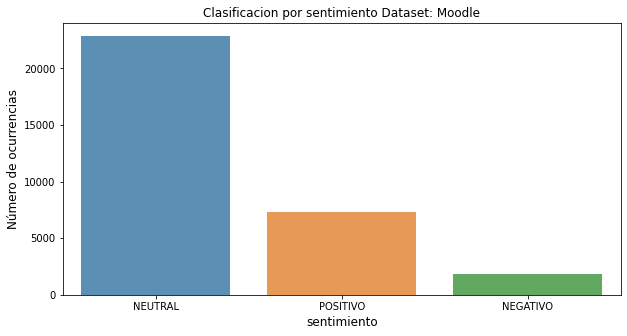

In [ ]:
#Analizar el dataset
#print(train_data["rating"].value_counts())
print(train_data["sentiment"].value_counts())
lang_count  = train_data["sentiment"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(lang_count.index, lang_count.values, alpha=0.8)
plt.title('Clasificacion por sentimiento Dataset: Moodle')
plt.ylabel('N√∫mero de ocurrencias', fontsize=12)
plt.xlabel('sentimiento', fontsize=12)
plt.show()



In [ ]:
print(train_data["sentiment"].value_counts())
train_data.to_csv('dataset_1_moodle.csv',columns=['cleaned','sentiment','source'])

NEUTRAL     22872
POSITIVO    7359 
NEGATIVO    1853 
Name: sentiment, dtype: int64
